# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
df = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")
year = df[:,0]
hares = df[:,1]
lynxes = df[:,2]
carrots = df[:,3]
year=year.astype(int)
plt.figure(figsize=(10, 5))
plt.plot(year, hares, label='Hares')
plt.plot(year, lynxes, label='Lynxes')
plt.xticks(np.arange(1900,1921,step = 1))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.legend()
plt.show()

<Figure size 1000x500 with 1 Axes>

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

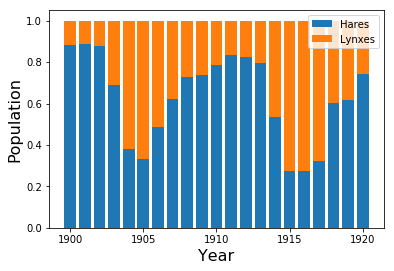

In [2]:
plt.bar(year, hares/np.sum(df[:, 1:3],axis=1), label="Hares")
plt.bar(year, lynxes/np.sum(df[:, 1:3],axis=1), bottom=hares/np.sum(df[:, 1:3],axis=1), label="Lynxes")
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

mean and std of the populations of hares are  34080.95238095238  and  20897.906458089667
mean and std of the populations of lynxes are  20166.666666666668  and  16254.591536908763
mean and std of the amount of carrots are  42400.0  and  3322.5062255844787


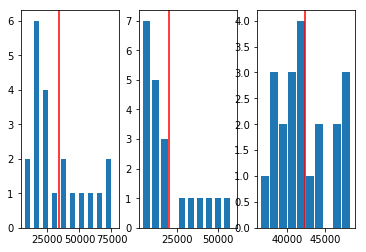

In [3]:
h_m=np.mean(hares)
h_s=np.std(hares)
print("mean and std of the populations of hares are ",h_m," and ",h_s)
l_m=np.mean(lynxes)
l_s=np.std(lynxes)
print("mean and std of the populations of lynxes are ",l_m," and ",l_s)
c_m=np.mean(carrots)
c_s=np.std(carrots)
print("mean and std of the amount of carrots are ",c_m," and ",c_s)
fig, a = plt.subplots(1,3)
a[0].hist(hares, width=4000)
a[1].hist(lynxes, width=4000)
a[2].hist(carrots, width=1000)
a[0].axvline(x=h_m, c='r')
a[1].axvline(x=l_m, c='r')
a[2].axvline(x=c_m, c='r')


Find which year each species had the largest population. Mark these years in the plot of populations.

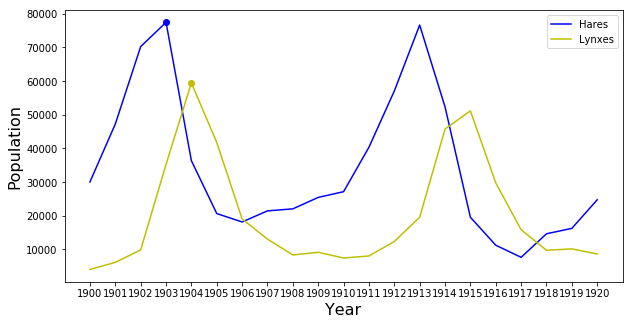

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(year, hares, label='Hares', c='b')
plt.plot(year, lynxes, label='Lynxes', c='y')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.plot(np.argmax(hares)+1900, np.max(hares),'ro', c='b')
plt.plot(np.argmax(lynxes)+1900, np.max(lynxes),'ro', c='y')
plt.xticks(np.arange(1900,1921,step = 1))
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

([<matplotlib.patches.Wedge at 0x1f93b77c5c0>,
 [Text(-0.685839,0.860015,'Hares'), Text(0.685839,-0.860015,'Lynxes')],
 [Text(-0.374094,0.469099,'71.43%'), Text(0.374094,-0.469099,'28.57%')])

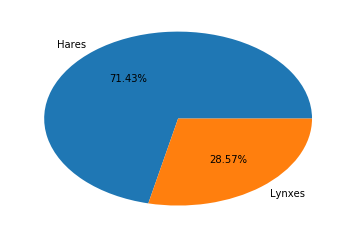

In [5]:
a=np.argmax(df[:, 1:3], axis=1)
a = ['H' if x==0 else 'L' for x in a]
plt.pie([a.count('H'),a.count('L')], labels = ['Hares','Lynxes'],autopct='%1.2f%%')

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

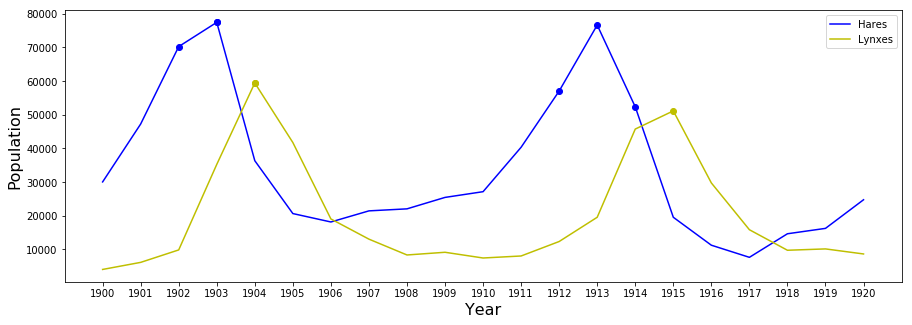

Years in which hares population is above 50000 are [1902 1903 1912 1913 1914]
Years in which lynxes population is above 50000 are  [1904 1915]


In [6]:
plt.figure(figsize=(15, 5))
plt.plot(year, hares, label='Hares', c='b')
plt.plot(year, lynxes, label='Lynxes', c='y')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.plot(np.argmax(hares)+1900, np.max(hares),'ro', c='b')
plt.plot(np.argmax(lynxes)+1900, np.max(lynxes),'ro', c='y')
plt.plot(year[df[:, 1] > 50000],hares[df[:, 1] > 50000],'ro',color='b')
plt.plot(year[df[:, 2] > 50000],lynxes[df[:, 2] > 50000],'ro',color='y')
plt.xticks(np.arange(1900,1921,step = 1))
plt.legend()
plt.show()
print('Years in which hares population is above 50000 are',year[df[:, 1] > 50000])
print('Years in which lynxes population is above 50000 are ',year[df[:, 2] > 50000])
                                                            

Find the top 2 years for each species when they had the lowest populations.

In [7]:
print("Top 2 years for hares are", np.argsort(hares)[0]+1900, np.argsort(hares)[1]+1900)
print("Top 2 years for lynxes are", np.argsort(lynxes)[0]+1900, np.argsort(lynxes)[1]+1900)

Top 2 years for hares are 1917 1916
Top 2 years for lynxes are 1900 1901


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

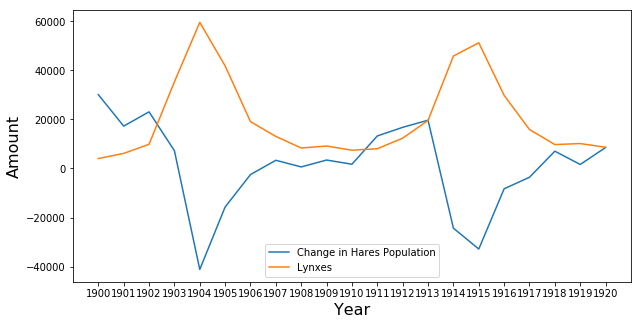

-0.851877743628691

In [8]:
hares1=np.array(0)
hares1=np.append(hares1, df[:20,1])
hares=df[:,1]
hares_ch=hares-hares1
plt.figure(figsize=(10, 5))
plt.plot(year, hares_ch, label='Change in Hares Population')
plt.plot(year, lynxes, label='Lynxes')
plt.xticks(np.arange(1900,1921,step = 1))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.legend()
plt.show()
np.corrcoef(hares_ch, lynxes)[0,1]

Show population of hares vs carrots and hares vs lynxes.

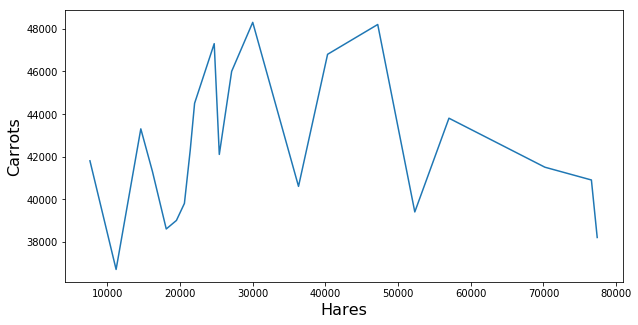

In [9]:
mintomax = np.argsort(df[:, 1])
plt.figure(figsize=(10, 5))
plt.plot(df[mintomax,1], df[mintomax,3])
plt.xlabel('Hares', fontsize=16)
plt.ylabel('Carrots', fontsize=16)
plt.show()

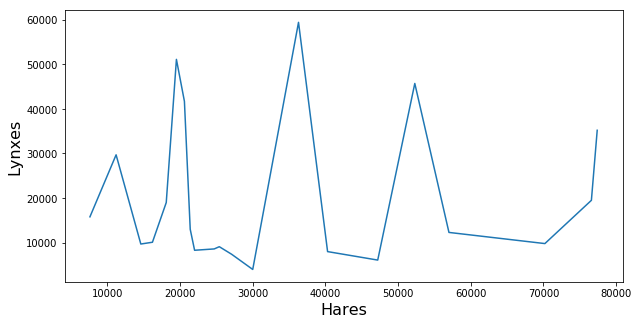

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df[mintomax,1], df[mintomax,2])
plt.xlabel('Hares', fontsize=16)
plt.ylabel('Lynxes', fontsize=16)
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

Воспользуемся одним из предыдущих заданий. На графике изменения количества зайцев и общего количества рысей можно заметить обратную зависимость, которую можно улучшить, если опустить график изменения количества зайцев вниз на величину correction.(На графике видно, что соотношение приблизительно КОЛИЧЕСТВО РЫСЕЙ=- ИЗМЕНЕНИЕ КОЛИЧЕСТВА ЗАЙЦЕВ + 10000 как при больших значениях(1904,1915), так и при малых(1907-1910)

In [11]:
correction=(np.sum(hares_ch)+np.sum(lynxes))/42
print(correction)

10671.42857142857


In [12]:
value=hares[19]+10000-lynxes[20]
print(value,abs(1-abs(value/hares[20])))

17600.0 0.28744939271255066
